<a href="https://colab.research.google.com/github/mahault/Bayesian-hyper-tuning/blob/main/Bayesian_hyper_parameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install scikit-optimize ace_tools

Best hyperparameters found: p1=6, p2=13 with score=0.7796


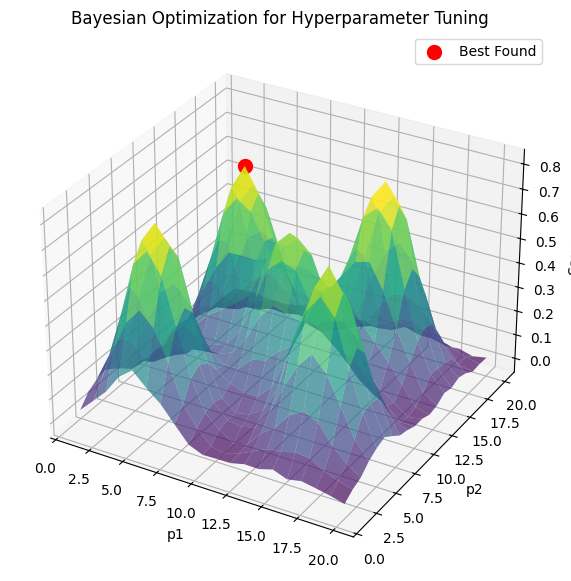

In [4]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import matplotlib.pyplot as plt
from skopt import gp_minimize
from skopt.space import Integer
from skopt.utils import use_named_args
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')



# Recreate the terrain function
def create_terrain():
    """Create a 20x20 terrain with multiple peaks."""
    np.random.seed(42)
    size = 20
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    terrain = np.zeros((size, size), dtype=float)
    centers = [(3, 4), (5, 15), (12, 5), (14, 14), (9, 10)]
    amplitudes = [0.78, 0.7, 0.75, 0.8, 0.65]
    sigma = 2.0

    for (cx, cy), amp in zip(centers, amplitudes):
        gauss = amp * np.exp(-((X - cx) ** 2 + (Y - cy) ** 2) / (2 * sigma ** 2))
        terrain += gauss

    terrain += 0.03 * np.random.rand(size, size)
    min_val, max_val = terrain.min(), terrain.max()
    terrain = (terrain - min_val) / (max_val - min_val) * 0.8

    logging.info("Terrain created successfully with multiple peaks.")

    return terrain

# Define global terrain grid
grid = create_terrain()

# Define the simulation function
# def simulate_model(p1, p2):
#     """Return the 'score' from the terrain grid for hyperparameters p1, p2."""
#     return grid[p1 - 1, p2 - 1]

def simulate_model(p1, p2):
    """Return the 'score' from the terrain grid for hyperparameters p1, p2."""
    score = grid[p1 - 1, p2 - 1]
    logging.info(f"Evaluating model at (p1={p1}, p2={p2}) -> Score: {score:.4f}")
    return score

# Define the hyperparameter space
space = [Integer(1, 20, name='p1'), Integer(1, 20, name='p2')]

# Define the objective function for Bayesian Optimization
@use_named_args(space)
def objective(p1, p2):
    """Objective function to be optimized."""
    logging.info(f"Running Bayesian Optimization step with (p1={p1}, p2={p2})")
    return -simulate_model(p1, p2)  # Minimize negative score to maximize performance

# Perform Bayesian Optimization
logging.info("Starting Bayesian Optimization...")
res_gp = gp_minimize(objective, space, n_calls=30, random_state=42)
logging.info("Bayesian Optimization complete.")

# Extract best found parameters
best_p1, best_p2 = res_gp.x
best_value = -res_gp.fun  # Convert back to positive
logging.info(f"Best hyperparameters found: p1={best_p1}, p2={best_p2} with score={best_value:.4f}")



# Print results
print(f"Best hyperparameters found: p1={best_p1}, p2={best_p2} with score={best_value:.4f}")

# Visualizing results
logging.info("Generating 3D visualization of results...")
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid of hyperparameter space
X, Y = np.meshgrid(range(1, 21), range(1, 21))
Z = np.array([[simulate_model(x, y) for x in range(1, 21)] for y in range(1, 21)])

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax.scatter(best_p1, best_p2, best_value, color='red', s=100, marker='o', label="Best Found")

ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('Score')
ax.set_title('Bayesian Optimization for Hyperparameter Tuning')
ax.legend()
plt.show()

logging.info("Visualization complete.")


Terrain created successfully with multiple peaks.
Starting Bayesian Optimization...
Running Bayesian Optimization step with (p1=16, p2=4)
Evaluating model at (p1=16, p2=4) -> Score: 0.4379
Running Bayesian Optimization step with (p1=16, p2=12)
Evaluating model at (p1=16, p2=12) -> Score: 0.2514
Running Bayesian Optimization step with (p1=9, p2=3)
Evaluating model at (p1=9, p2=3) -> Score: 0.1090
Running Bayesian Optimization step with (p1=10, p2=7)
Evaluating model at (p1=10, p2=7) -> Score: 0.2248
Running Bayesian Optimization step with (p1=4, p2=13)
Evaluating model at (p1=4, p2=13) -> Score: 0.4494
Running Bayesian Optimization step with (p1=2, p2=15)
Evaluating model at (p1=2, p2=15) -> Score: 0.0861
Running Bayesian Optimization step with (p1=19, p2=1)
Evaluating model at (p1=19, p2=1) -> Score: 0.0175
Running Bayesian Optimization step with (p1=20, p2=13)
Evaluating model at (p1=20, p2=13) -> Score: 0.0285
Running Bayesian Optimization step with (p1=13, p2=1)
Evaluating model at 

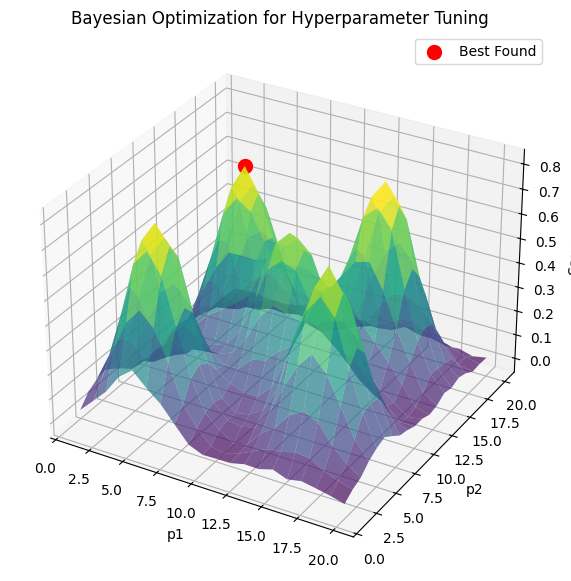

Visualization complete.


In [5]:
# Re-run Bayesian Optimization with print statements instead of logging

# Define the hyperparameter space again
space = [Integer(1, 20, name='p1'), Integer(1, 20, name='p2')]

# Replace logging with print statements in terrain function
def create_terrain():
    """Create a 20x20 terrain with multiple peaks."""
    np.random.seed(42)
    size = 20
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    terrain = np.zeros((size, size), dtype=float)
    centers = [(3, 4), (5, 15), (12, 5), (14, 14), (9, 10)]
    amplitudes = [0.78, 0.7, 0.75, 0.8, 0.65]
    sigma = 2.0

    for (cx, cy), amp in zip(centers, amplitudes):
        gauss = amp * np.exp(-((X - cx) ** 2 + (Y - cy) ** 2) / (2 * sigma ** 2))
        terrain += gauss

    terrain += 0.03 * np.random.rand(size, size)
    min_val, max_val = terrain.min(), terrain.max()
    terrain = (terrain - min_val) / (max_val - min_val) * 0.8

    print("Terrain created successfully with multiple peaks.")
    return terrain

# Initialize the terrain
grid = create_terrain()

# Define the simulation function with print statements
def simulate_model(p1, p2):
    """Return the 'score' from the terrain grid for hyperparameters p1, p2."""
    score = grid[p1 - 1, p2 - 1]
    print(f"Evaluating model at (p1={p1}, p2={p2}) -> Score: {score:.4f}")
    return score

# Define the objective function for Bayesian Optimization with print statements
@use_named_args(space)
def objective(p1, p2):
    """Objective function to be optimized."""
    print(f"Running Bayesian Optimization step with (p1={p1}, p2={p2})")
    return -simulate_model(p1, p2)  # Minimize negative score to maximize performance

# Perform Bayesian Optimization with print statements
print("Starting Bayesian Optimization...")
res_gp = gp_minimize(objective, space, n_calls=30, random_state=42)
print("Bayesian Optimization complete.")

# Extract best found parameters
best_p1, best_p2 = res_gp.x
best_value = -res_gp.fun  # Convert back to positive
print(f"Best hyperparameters found: p1={best_p1}, p2={best_p2} with score={best_value:.4f}")

# Visualizing results with print statements
print("Generating 3D visualization of results...")
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid of hyperparameter space
X, Y = np.meshgrid(range(1, 21), range(1, 21))
Z = np.array([[simulate_model(x, y) for x in range(1, 21)] for y in range(1, 21)])

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax.scatter(best_p1, best_p2, best_value, color='red', s=100, marker='o', label="Best Found")

ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('Score')
ax.set_title('Bayesian Optimization for Hyperparameter Tuning')
ax.legend()
plt.show()

print("Visualization complete.")


In [13]:
!pip install ace-tools-open


### Bayesian Optimization vs Grid Search Comparison ###
                  Method  Best p1  Best p2  Best Score  Evaluations  \
0  Bayesian Optimization        6       13    0.779583           30   
1            Grid Search       15       15    0.800000          400   

   Time (seconds)  
0       19.218604  
1        0.000705  

Execution Summary:
- Bayesian Optimization found best (p1=6, p2=13) with score 0.7796 in 30 evaluations, taking 19.2186 seconds.
- Grid Search found best (p1=15, p2=15) with score 0.8000 in 400 evaluations, taking 0.0007 seconds.


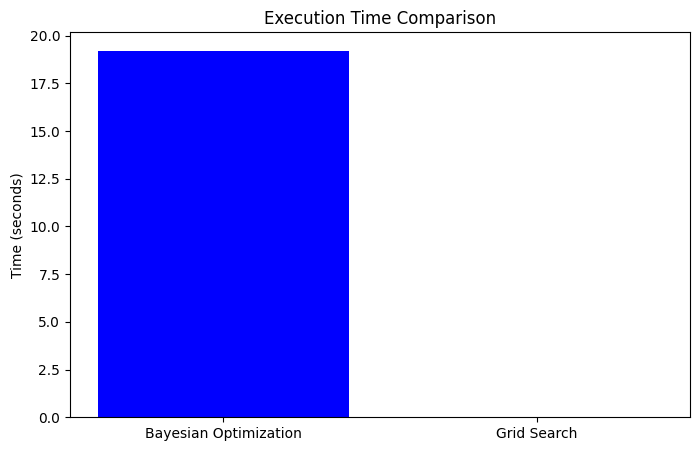

In [17]:
# Re-import necessary libraries after execution state reset
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from skopt import gp_minimize
from skopt.space import Integer
from skopt.utils import use_named_args

# Recreate the terrain function
def create_terrain():
    """Create a 20x20 terrain with multiple peaks."""
    np.random.seed(42)
    size = 20
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    terrain = np.zeros((size, size), dtype=float)
    centers = [(3, 4), (5, 15), (12, 5), (14, 14), (9, 10)]
    amplitudes = [0.78, 0.7, 0.75, 0.8, 0.65]
    sigma = 2.0

    for (cx, cy), amp in zip(centers, amplitudes):
        gauss = amp * np.exp(-((X - cx) ** 2 + (Y - cy) ** 2) / (2 * sigma ** 2))
        terrain += gauss

    terrain += 0.03 * np.random.rand(size, size)
    min_val, max_val = terrain.min(), terrain.max()
    terrain = (terrain - min_val) / (max_val - min_val) * 0.8

    return terrain

# Initialize the terrain
grid = create_terrain()

# Define the simulation function
def simulate_model(p1, p2):
    """Return the 'score' from the terrain grid for hyperparameters p1, p2."""
    return grid[p1 - 1, p2 - 1]

# Define the hyperparameter space
space = [Integer(1, 20, name='p1'), Integer(1, 20, name='p2')]

# Track evaluations
evaluation_count = 0

# Define the objective function for Bayesian Optimization
@use_named_args(space)
def bayesian_objective(p1, p2):
    """Objective function for Bayesian Optimization."""
    global evaluation_count
    evaluation_count += 1
    return -simulate_model(p1, p2)  # Minimize negative score to maximize performance

# Run Bayesian Optimization
start_time_bayesian = time.time()
evaluation_count = 0
res_gp = gp_minimize(bayesian_objective, space, n_calls=30, random_state=42)
end_time_bayesian = time.time()

# Extract best found parameters
best_p1_bayes, best_p2_bayes = res_gp.x
best_value_bayes = -res_gp.fun

# Store Bayesian Optimization results
bayesian_results = {
    "Method": "Bayesian Optimization",
    "Best p1": best_p1_bayes,
    "Best p2": best_p2_bayes,
    "Best Score": best_value_bayes,
    "Evaluations": evaluation_count,
    "Time (seconds)": end_time_bayesian - start_time_bayesian
}

# Run Brute Force Grid Search
start_time_grid = time.time()
best_p1_grid, best_p2_grid, best_value_grid = None, None, -float("inf")
evaluation_count_grid = 0

for p1 in range(1, 21):
    for p2 in range(1, 21):
        evaluation_count_grid += 1
        score = simulate_model(p1, p2)
        if score > best_value_grid:
            best_value_grid = score
            best_p1_grid, best_p2_grid = p1, p2

end_time_grid = time.time()

# Store Grid Search results
grid_results = {
    "Method": "Grid Search",
    "Best p1": best_p1_grid,
    "Best p2": best_p2_grid,
    "Best Score": best_value_grid,
    "Evaluations": evaluation_count_grid,
    "Time (seconds)": end_time_grid - start_time_grid
}

# Create DataFrame for results
results_df = pd.DataFrame([bayesian_results, grid_results])

# Print comparison results
print("\n### Bayesian Optimization vs Grid Search Comparison ###")
print(results_df)

# Save results to a CSV file for further analysis
results_df.to_csv("bayesian_vs_grid_search_results.csv", index=False)

# Display execution summary
print("\nExecution Summary:")
print(f"- Bayesian Optimization found best (p1={best_p1_bayes}, p2={best_p2_bayes}) with score {best_value_bayes:.4f} "
      f"in {bayesian_results['Evaluations']} evaluations, taking {bayesian_results['Time (seconds)']:.4f} seconds.")
print(f"- Grid Search found best (p1={best_p1_grid}, p2={best_p2_grid}) with score {best_value_grid:.4f} "
      f"in {grid_results['Evaluations']} evaluations, taking {grid_results['Time (seconds)']:.4f} seconds.")

# Plot execution time comparison
methods = ["Bayesian Optimization", "Grid Search"]
times = [bayesian_results["Time (seconds)"], grid_results["Time (seconds)"]]

plt.figure(figsize=(8, 5))
plt.bar(methods, times, color=['blue', 'red'])
plt.ylabel("Time (seconds)")
plt.title("Execution Time Comparison")
plt.show()


In [20]:
!pip install pomdp-py gpytorch torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.7/277.7 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [18]:
# Install POMDPy (if not installed)


# Import required libraries
import numpy as np
import random
import gpytorch
import torch
from pomdpy.pomdp import POMDP
from pomdpy.pomdp_belief import Belief
from pomdpy.planner import MCTSSolver
from pomdpy.discrete_pomdp import DiscreteActionPool, DiscreteObservationPool, DiscreteStatePool

# Define Hyperparameter Optimization as a POMDP
class HPOState:
    """Represents a state in the hyperparameter tuning POMDP."""
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def __str__(self):
        return f"State(p1={self.p1}, p2={self.p2})"

class HPOAction:
    """Represents an action in the hyperparameter tuning POMDP."""
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

    def __str__(self):
        return f"Action(p1={self.p1}, p2={self.p2})"

class HPOObservation:
    """Represents an observation in the hyperparameter tuning POMDP."""
    def __init__(self, score):
        self.score = score

    def __str__(self):
        return f"Observation(score={self.score:.4f})"

class HPOBelief(Belief):
    """Maintains a belief distribution over the hyperparameter space."""
    def __init__(self, hyperparameter_space):
        super().__init__()
        self.hyperparameter_space = hyperparameter_space
        self.belief_distribution = {hp: 1/len(hyperparameter_space) for hp in hyperparameter_space}  # Uniform prior

    def update(self, action, observation):
        """Update beliefs using a Gaussian Process."""
        with torch.no_grad():
            # Update beliefs based on observed performance
            new_beliefs = {}
            for hp in self.hyperparameter_space:
                mean = grid[hp[0] - 1, hp[1] - 1]
                variance = 0.05  # Small noise
                prob = np.exp(-((observation.score - mean) ** 2) / (2 * variance))
                new_beliefs[hp] = self.belief_distribution[hp] * prob

            # Normalize beliefs
            total_prob = sum(new_beliefs.values())
            if total_prob > 0:
                for hp in new_beliefs:
                    new_beliefs[hp] /= total_prob
            self.belief_distribution = new_beliefs

    def sample(self):
        """Sample from belief distribution."""
        return max(self.belief_distribution, key=self.belief_distribution.get)

class HPOPOMDP(POMDP):
    """Defines the Hyperparameter Optimization problem as a POMDP."""
    def __init__(self):
        super().__init__()
        self.action_space = [(p1, p2) for p1 in range(1, 21) for p2 in range(1, 21)]
        self.belief = HPOBelief(self.action_space)

    def sample_initial_state(self):
        return HPOState(*random.choice(self.action_space))

    def get_transition_model(self, state, action):
        return HPOState(action.p1, action.p2)

    def get_observation_model(self, state):
        return HPOObservation(grid[state.p1 - 1, state.p2 - 1] + np.random.normal(0, 0.05))  # Small noise

    def get_reward_model(self, state):
        return grid[state.p1 - 1, state.p2 - 1]  # Reward = model performance

    def is_terminal(self, state):
        return False  # HPO does not have terminal states

    def get_action_pool(self):
        return DiscreteActionPool(self.action_space)

    def get_observation_pool(self):
        return DiscreteObservationPool([HPOObservation(grid[p1-1, p2-1]) for p1, p2 in self.action_space])

    def get_state_pool(self):
        return DiscreteStatePool([HPOState(p1, p2) for p1, p2 in self.action_space])

# Initialize the POMDP
hpo_pomdp = HPOPOMDP()

# Use Monte Carlo Tree Search (MCTS) to solve it
mcts_solver = MCTSSolver(hpo_pomdp)

# Run MCTS-based Hyperparameter Optimization
best_action = None
best_score = -float("inf")
num_iterations = 30  # Limit iterations for efficiency

for _ in range(num_iterations):
    action = mcts_solver.select_action()
    observation = hpo_pomdp.get_observation_model(action)
    hpo_pomdp.belief.update(action, observation)

    if observation.score > best_score:
        best_score = observation.score
        best_action = action

print(f"\nBest hyperparameters found using POMDP: p1={best_action.p1}, p2={best_action.p2} with score={best_score:.4f}")


ERROR: Could not find a version that satisfies the requirement pomdpy (from versions: none)
ERROR: No matching distribution found for pomdpy


ModuleNotFoundError: No module named 'gpytorch'

In [23]:
!pip install inferactively-pymdp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.5 MB/s eta 0:00:00


In [1]:
import numpy as np
from pymdp.agent import Agent
from pymdp.utils import softmax, sample
import matplotlib.pyplot as plt

# Define the hyperparameter performance landscape (like in Bayesian HPO)
def create_terrain():
    np.random.seed(42)
    size = 20
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    terrain = np.zeros((size, size), dtype=float)
    centers = [(3, 4), (5, 15), (12, 5), (14, 14), (9, 10)]
    amplitudes = [0.78, 0.7, 0.75, 0.8, 0.65]
    sigma = 2.0

    for (cx, cy), amp in zip(centers, amplitudes):
        gauss = amp * np.exp(-((X - cx) ** 2 + (Y - cy) ** 2) / (2 * sigma ** 2))
        terrain += gauss

    terrain += 0.03 * np.random.rand(size, size)
    terrain = (terrain - terrain.min()) / (terrain.max() - terrain.min()) * 0.8

    return terrain

# Generate the 20x20 terrain
terrain = create_terrain()

# Define Active Inference POMDP parameters
grid_size = 20  # 20x20 hyperparameter grid

# Define state space, action space, and observation space
num_states = grid_size * grid_size  # Each (p1, p2) pair is a unique state
num_actions = grid_size * grid_size  # 400 actions (each selecting a specific (p1, p2) combination)
num_observations = grid_size * grid_size  # Observations correspond to noisy performance values

# Define Generative Model Components
likelihood_matrix = np.eye(num_observations, num_states)  # Perfect mapping from states to observations
transition_matrix = np.eye(num_states, num_states)  # Deterministic transitions
prior_preferences = np.ones(num_observations) / num_observations  # Uniform reward prior

# Define Active Inference Agent
agent = Agent(
    A=likelihood_matrix,
    B=transition_matrix,
    C=prior_preferences,
    planning_horizon=1,  # One-step planning (can increase if needed)
    action_precision=1.0,  # Controls exploration-exploitation tradeoff
)

# Run Active Inference-based Hyperparameter Optimization
num_trials = 30
for trial in range(num_trials):
    state_index = np.argmax(agent.infer_states())  # Infer current hyperparameter state
    p1, p2 = divmod(state_index, grid_size)

    # Evaluate model performance at selected hyperparameters
    score = terrain[p1, p2] + np.random.normal(0, 0.05)
    observation_index = int(score * (num_observations - 1))

    # Update agent with observation and perform active inference step
    agent.update_beliefs(o=observation_index)
    agent.infer_policies()

    print(f"Trial {trial + 1}: Selected (p1={p1}, p2={p2}) -> Score: {score:.4f}")

# Find the best hyperparameters found by Active Inference
best_state_index = np.argmax(agent.infer_states())
best_p1, best_p2 = divmod(best_state_index, grid_size)
best_score = terrain[best_p1, best_p2]

print(f"\nBest hyperparameters found using Active Inference: p1={best_p1}, p2={best_p2} with score={best_score:.4f}")

# Visualize the final belief distribution over hyperparameters
beliefs = agent.infer_states().reshape((grid_size, grid_size))
plt.imshow(beliefs, cmap="hot", interpolation="nearest")
plt.colorbar(label="Belief Strength")
plt.xlabel("p1")
plt.ylabel("p2")
plt.title("Final Belief Distribution over Hyperparameter Space")
plt.show()


ImportError: cannot import name 'softmax' from 'pymdp.utils' (/usr/local/lib/python3.11/dist-packages/pymdp/utils.py)

B shape: [(20, 20, 20), (20, 20, 20)]
Number of control states: [20, 20]
Policies: [array([[0, 0]]), array([[0, 1]]), array([[0, 2]]), array([[0, 3]]), array([[0, 4]]), array([[0, 5]]), array([[0, 6]]), array([[0, 7]]), array([[0, 8]]), array([[0, 9]]), array([[ 0, 10]]), array([[ 0, 11]]), array([[ 0, 12]]), array([[ 0, 13]]), array([[ 0, 14]]), array([[ 0, 15]]), array([[ 0, 16]]), array([[ 0, 17]]), array([[ 0, 18]]), array([[ 0, 19]]), array([[1, 0]]), array([[1, 1]]), array([[1, 2]]), array([[1, 3]]), array([[1, 4]]), array([[1, 5]]), array([[1, 6]]), array([[1, 7]]), array([[1, 8]]), array([[1, 9]]), array([[ 1, 10]]), array([[ 1, 11]]), array([[ 1, 12]]), array([[ 1, 13]]), array([[ 1, 14]]), array([[ 1, 15]]), array([[ 1, 16]]), array([[ 1, 17]]), array([[ 1, 18]]), array([[ 1, 19]]), array([[2, 0]]), array([[2, 1]]), array([[2, 2]]), array([[2, 3]]), array([[2, 4]]), array([[2, 5]]), array([[2, 6]]), array([[2, 7]]), array([[2, 8]]), array([[2, 9]]), array([[ 2, 10]]), array([

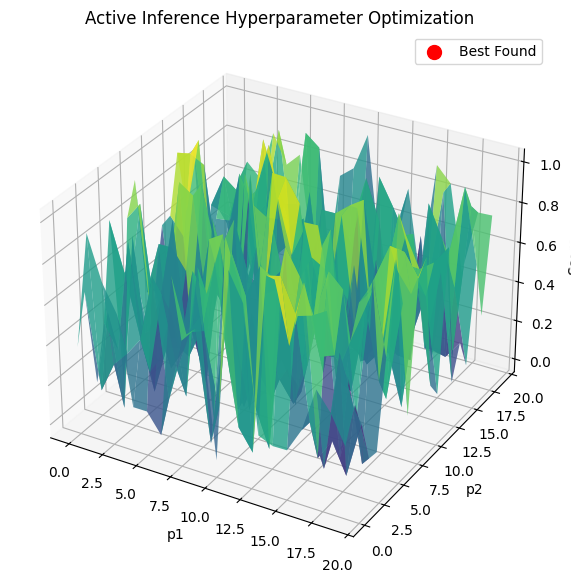

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pymdp.agent import Agent
from pymdp.utils import obj_array, norm_dist

################################################
# 1) Define a softmax function (if needed)
################################################
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Stability trick
    return exp_x / exp_x.sum(axis=0, keepdims=True)

################################################
# 2) Define the generative model
################################################
def create_hpo_model(grid_size=20):
    """
    Creates a generative model for hyperparameter optimization
    with 2 hidden-state factors: (p1, p2).
    We have 2 observation modalities:
      - modality 0: observed p1 (20 possible outcomes)
      - modality 1: observed p2 (20 possible outcomes)
    We have 2 control factors (for p1 and p2), each with 20 actions.
    """

    # Hidden states: 2 factors => [20, 20]
    num_states = [grid_size, grid_size]

    # Observations: 2 modalities => each has 20 possible outcomes
    # (In your real scenario, you might encode scores differently;
    #  here we treat "observed p1" as the first modality and "observed p2" as the second.)
    num_obs = [grid_size, grid_size]

    # Controls: 2 factors => each can choose from 20 actions
    num_controls = [grid_size, grid_size]

    # --------------- A-matrix (Likelihood) ---------------
    # A is an "object array" of length = #modalities = 2
    # A[0] has shape (20, 20, 20), meaning:
    #   - 20 possible outcomes for modality 0,
    #   - 20 states for factor 1 (p1),
    #   - 20 states for factor 2 (p2).
    #
    # We'll define A[0][p1, p1, p2] = 1.0 => if the hidden states are (p1, p2),
    # we observe outcome "p1" for the first modality.
    # Similarly for A[1], we observe "p2".
    A = obj_array(len(num_obs))
    A[0] = np.zeros((grid_size, grid_size, grid_size))
    A[1] = np.zeros((grid_size, grid_size, grid_size))

    for p1 in range(grid_size):
        for p2 in range(grid_size):
            # First modality: "observed p1"
            A[0][p1, p1, p2] = 1.0
            # Second modality: "observed p2"
            A[1][p2, p1, p2] = 1.0

    # --------------- B-matrix (Transition) ---------------
    # B is an object array of length = #factors = 2
    # Each B[i] has shape (num_states[i], num_states[i], num_controls[i])
    # e.g. B[0].shape = (20, 20, 20)
    #
    # We'll define an action "a" in factor i to mean "next state of factor i is a".
    from pymdp.utils import norm_dist

    B = obj_array(len(num_states))
    for i in range(len(num_states)):
        nS = num_states[i]      # 20
        nA = num_controls[i]    # 20
        B[i] = np.zeros((nS, nS, nA))
        # Fill B[i] such that for each action a, we set the next-state to 'a' with probability 1
        for a in range(nA):
            for s_curr in range(nS):
                B[i][a, s_curr, a] = 1.0

        B[i] = norm_dist(B[i])  # Normalize transition probabilities

    # --------------- C-matrix (Preferences) ---------------
    # C is an object array of length = #modalities = 2
    # Each C[i] is a 1D array of length num_obs[i]
    # For example, we can put a strong preference on higher p2 indices
    #   (or you can distribute preferences as you like).
    C = obj_array(len(num_obs))
    for i in range(len(num_obs)):
        C[i] = np.zeros(num_obs[i])
    # For instance, prefer the highest index in the second modality:
    # (You could also incorporate both modalities if desired.)
    C[1][-1] = 1.0  # Strong preference for p2=19 observation

    return A, B, C


################################################
# 3) Instantiate the generative model and agent
################################################
# Build A, B, C
A, B, C = create_hpo_model(grid_size=20)

# Create an active inference agent
# We'll specify a single-step horizon for simplicity
agent = Agent(A=A, B=B, C=C, inference_params={'horizon': 1})

# Debug prints
print(f"B shape: {[b.shape for b in agent.B]}")
print(f"Number of control states: {agent.num_controls}")
print("Policies:", agent.policies)
print("Shape of policies:", [p.shape for p in agent.policies])
print("Shape of first policy:", agent.policies[0].shape)
print("Total number of policies:", len(agent.policies))
print("Policy length:", agent.policy_len)
print("Number of control factors:", agent.num_factors)
print("Shape of B:", [b.shape for b in agent.B])

################################################
# 4) Define the terrain function for performance
################################################
def create_terrain(size=20):
    np.random.seed(42)
    terrain = np.random.rand(size, size)  # Random performance scores
    return terrain

grid = create_terrain()

################################################
# 5) Define the function to get observation
################################################
def get_observation(p1, p2):
    """
    For a chosen hyperparam combination (p1, p2),
    return the 2D observation [p1, p2] and the actual
    'score' from our terrain.
    """
    # Convert float -> int so it indexes properly
    p1 = int(p1)
    p2 = int(p2)

    score = grid[p1, p2]
    obs = [p1, p2]
    return obs, score
    # In a real scenario, you'd convert a continuous score into some discrete category,
    # or you'd have a single continuous observation dimension, etc.
    # Here, we're just returning p1 in the first modality, p2 in the second modality


################################################
# 6) Main loop: Active Inference-based HPO
################################################
num_trials = 30
history = []

for t in range(num_trials):
    # Provide a random initial observation to infer states from
    # e.g. [rand_p1, rand_p2]
    rand_obs = [np.random.randint(20), np.random.randint(20)]
    qx = agent.infer_states(rand_obs)

    print("Agent attributes:", dir(agent))
    print("Non-callable attributes:",
          [attr for attr in dir(agent)
           if not callable(getattr(agent, attr))
           and not attr.startswith("__")])

    # Check that we indeed have 2 hidden-state factors
    assert len(agent.qs) == 2, "We expected 2 factors (p1 and p2)!"
    print("Belief shapes for each factor:", agent.qs[0].shape, agent.qs[1].shape)

    # Infer policies (one-step)
    q_pi, G = agent.infer_policies()
    print("q_pi (posterior over policies):", q_pi)

    # Sample an action => best hyperparameter choice
    action = agent.sample_action()  # returns e.g. [p1_action, p2_action]
    # Evaluate performance
    obs, score = get_observation(*action)

    # Update agent beliefs with the new observation
    agent.infer_states(obs)
    agent.infer_policies()

    # Store results
    history.append((action, score))
    print(f"Iteration {t+1}: Best hyperparameters = {action}, Score = {score:.4f}")

# Find best result
best_action, best_score = max(history, key=lambda x: x[1])
print(f"\nOptimal hyperparameters found: p1={best_action[0]}, p2={best_action[1]}, Score={best_score:.4f}")

################################################
# 7) Visualization
################################################
X, Y = np.meshgrid(range(20), range(20))
Z = grid

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(best_action[0], best_action[1], best_score,
           color='red', s=100, marker='o', label="Best Found")

ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('Score')
ax.set_title('Active Inference Hyperparameter Optimization')
ax.legend()
plt.show()
